In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
df = pd.read_csv('Filtered_Video_Games_Data.csv', header=None)  # Set header=None if there's no header

# Get the x and y values from the CSV file
image_paths = df[0].values[1:]
labels = df[3].values[1:]

# Encode the labels
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

# Suppose you started with a list of genre names like this:
genres = ['Action', 'Adventure', 'Role-Playing', 'Sports', 'Shooter', 'Platform', 'Strategy', 'Puzzle', 'Racing', 'Simulation']

# Encode genres into integers
le = LabelEncoder()
Y = le.fit_transform(genres)

# Or build a mapping dictionary:
genre_map = {code: label for label, code in zip(encoder.classes_, encoder.transform(encoder.classes_))}
print(genre_map)

{np.int64(0): 'Action', np.int64(1): 'Adventure', np.int64(2): 'Platform', np.int64(3): 'Puzzle', np.int64(4): 'Racing', np.int64(5): 'Role-Playing', np.int64(6): 'Shooter', np.int64(7): 'Simulation', np.int64(8): 'Sports', np.int64(9): 'Strategy'}


In [2]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np

# Image processing
IMAGE_SIZE = (200, 200)
base_url = 'https://www.vgchartz.com'

def load_image(image_path):
    full_url = base_url + image_path
    response = requests.get(full_url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content)).convert('RGB')
        img = img.resize(IMAGE_SIZE)
        return np.array(img)  # Keep 3D shape (200, 200, 3)
    else:
        raise Exception(f"Image failed to load from {full_url}")

# Load and flatten all images
X = np.array([load_image(p) for p in image_paths[:1000]])
Y = np.array(labels_encoded[:1000])

Exception: Image failed to load from https://www.vgchartz.com/games/boxart/3330776ccc.jpg

In [ ]:
# Split train/test
x_train = X[0:500]
y_train = Y[0:500]
x_test = X[500:]
y_test = Y[500:]

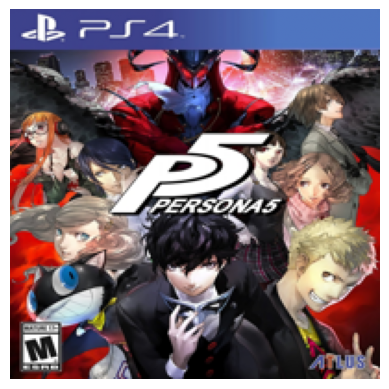

This is Role-Playing


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Pick a random index
random_image = np.random.randint(len(Y))

# Display the image, normalize pixel values to [0,1] for matplotlib
plt.imshow(X[random_image] / 255.0)
plt.axis('off')
plt.show()

# Print label
print("This is %s" % genre_map[Y[random_image]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Normalize image pixel values to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
num_classes = len(encoder.classes_)  # e.g., 10 genres
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Check shape of input images
print("Input shape:", x_train.shape[1:])  # Should be (200, 200, 3)

# Define the CNN model
model = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Dropout(0.5),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')  # Softmax for multi-class genre classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_cat,
                    batch_size=16,
                    epochs=10,
                    validation_data=(x_test, y_test_cat))

Input shape: (200, 200, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.1468 - loss: 4.7968 - val_accuracy: 0.2260 - val_loss: 2.1094
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.3074 - loss: 1.9601 - val_accuracy: 0.2780 - val_loss: 1.9477
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.3947 - loss: 1.6743 - val_accuracy: 0.3000 - val_loss: 2.0055
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.5168 - loss: 1.4772 - val_accuracy: 0.3320 - val_loss: 1.8739
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.6197 - loss: 1.0155 - val_accuracy: 0.3560 - val_loss: 1.9144
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.7599 - loss: 0.7082 - val_accuracy: 0.3620 - val_loss: 2.0537
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - accuracy: 0.8691 - loss: 0.3961 - val_accuracy: 0.3280 - val_loss: 2.7261
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.9526 - loss: 0.1995 - val_accuracy: 0.3980 - val_

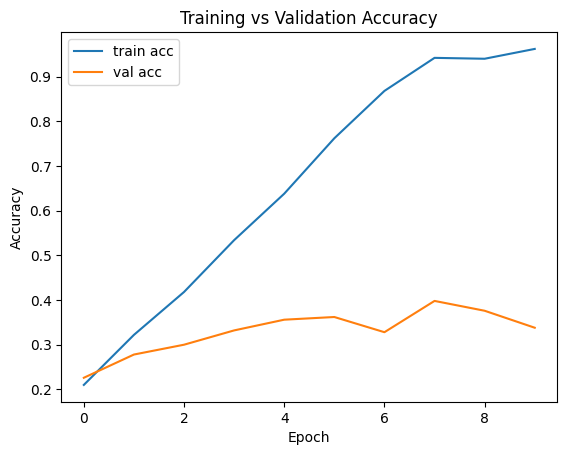

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()